# Making bets

Here we are testing how much money our neural network would make or lose when it's used for making bets.

In [37]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
from pylab import rcParams

rcParams['figure.figsize'] = 15, 8
model = load_model('modules/neural_network/neural_network.h5')

data = pd.read_csv("datasets/data.csv")
data = data.sort_values(['season', 'month'], ascending=(True, True))
test = data[(data['season'] == 2015) & (data['month'] > 8)]

y_test = test.loc[:, 'label']
X_test = test.drop('label', axis=1)

bookmakers = ["B365", "BW", "IW", "LB", "WH", "VC"]

## Make constant predictions

In [38]:
def predict_constant(X_test, y_test, constant_pred, bookmaker):
    # total money
    money = 0
    # how much money we are betting on each match
    money_to_bet = 1
    # keep track of money at each bet for plotting
    money_states = []
    
    for index in range(len(y_test)):

        coefficients = [X_test.iloc[index][bookmaker + "A"], X_test.iloc[index][bookmaker + "D"], X_test.iloc[index][bookmaker + "H"]]
        # make a bet
        money -= money_to_bet
        
        # win money
        if constant_pred == y_test.iloc[index]:
            money += money_to_bet * coefficients[constant_pred]
            
        money_states.append(money)
        
    plt.plot(money_states, label=bookmaker)
    return money

BK B365: profit -70.04
BK BW: profit -80.97
BK IW: profit -96.15
BK LB: profit -81.45
BK WH: profit -69.46
BK VC: profit -58.19


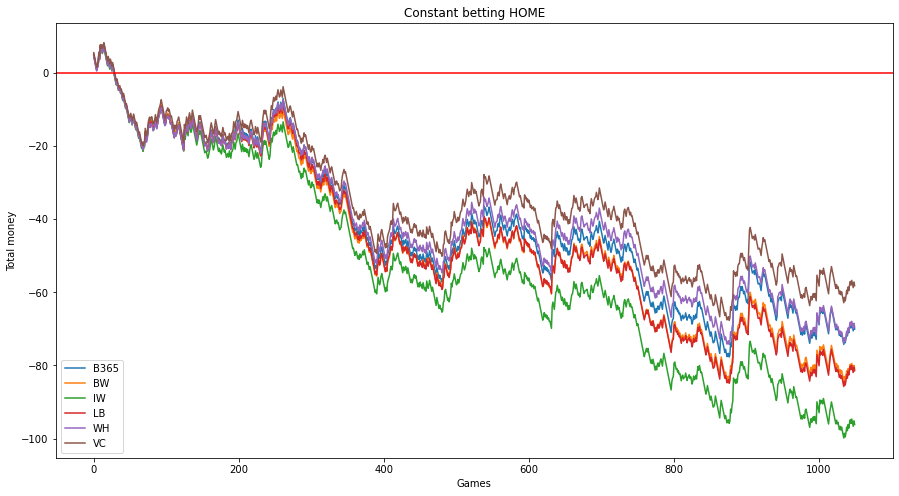

BK B365: profit -40.05
BK BW: profit -68.63
BK IW: profit -94.55
BK LB: profit -59.85
BK WH: profit -96.72
BK VC: profit -13.87


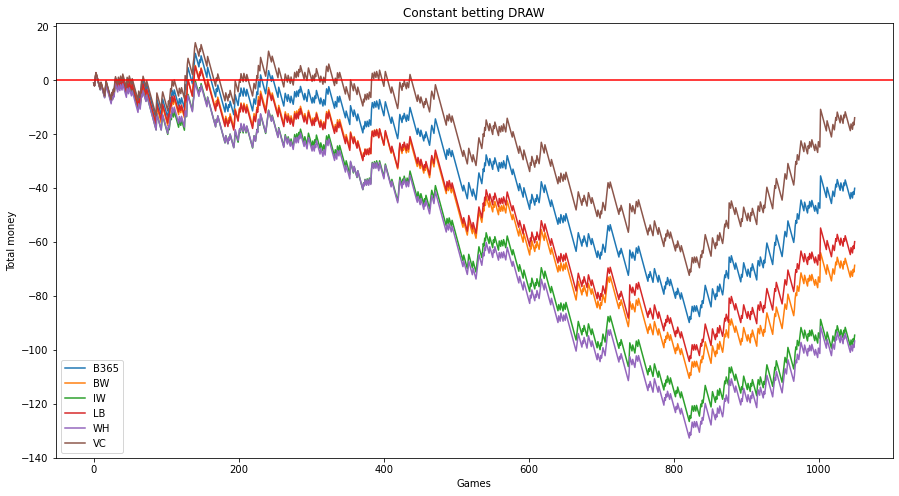

BK B365: profit -38.53
BK BW: profit -75.94
BK IW: profit -104.43
BK LB: profit -49.21
BK WH: profit -61.83
BK VC: profit -15.62


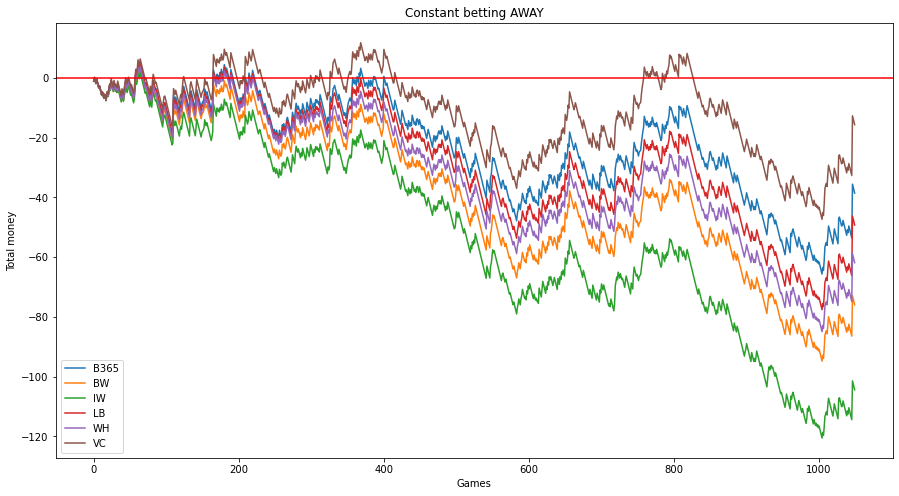

<Figure size 1080x576 with 0 Axes>

In [50]:
for bk in bookmakers:
    profit = predict_constant(X_test, y_test, 2, bk)
    print("BK " + bk + ": profit " + str(round(profit, 2)))
plt.legend()
plt.xlabel("Games")
plt.ylabel("Total money")
plt.title("Constant betting HOME")
plt.axhline(y=0, color='r', linestyle='-')
plt.show()
plt.savefig("images/betting_constant_home.png")

for bk in bookmakers:
    profit = predict_constant(X_test, y_test, 1, bk)
    print("BK " + bk + ": profit " + str(round(profit, 2)))
    
plt.legend()
plt.xlabel("Games")
plt.ylabel("Total money")
plt.title("Constant betting DRAW")
plt.axhline(y=0, color='r', linestyle='-')
plt.show()
plt.savefig("images/betting_constant_draw.png")

for bk in bookmakers:
    profit = predict_constant(X_test, y_test, 0, bk)
    print("BK " + bk + ": profit " + str(round(profit, 2)))
    
plt.legend()
plt.xlabel("Games")
plt.ylabel("Total money")
plt.title("Constant betting AWAY")
plt.axhline(y=0, color='r', linestyle='-')
plt.show()
plt.savefig("images/betting_constant_away.png")

## Make predictions using our neural network

In [40]:
def bet_on_prediction(X_test, y_test, predictions, bookmaker):
    money = 0
    money_on_bet = 1
    money_states = []
    
    for index, prediction in enumerate(predictions):

        coefficients = [X_test.iloc[index][bookmaker + "A"], X_test.iloc[index][bookmaker + "D"], X_test.iloc[index][bookmaker + "H"]]
        
        # make a bet
        money -= money_on_bet
        
        # win money
        if prediction == y_test.iloc[index]:
            money += money_on_bet * coefficients[prediction]
            
        money_states.append(money)
        
    plt.plot(money_states, label=bookmaker)
    
    return money

BK B365: profit 36.63
BK BW: profit 10.96
BK IW: profit -14.78
BK LB: profit 16.15
BK WH: profit 6.65
BK VC: profit 52.27


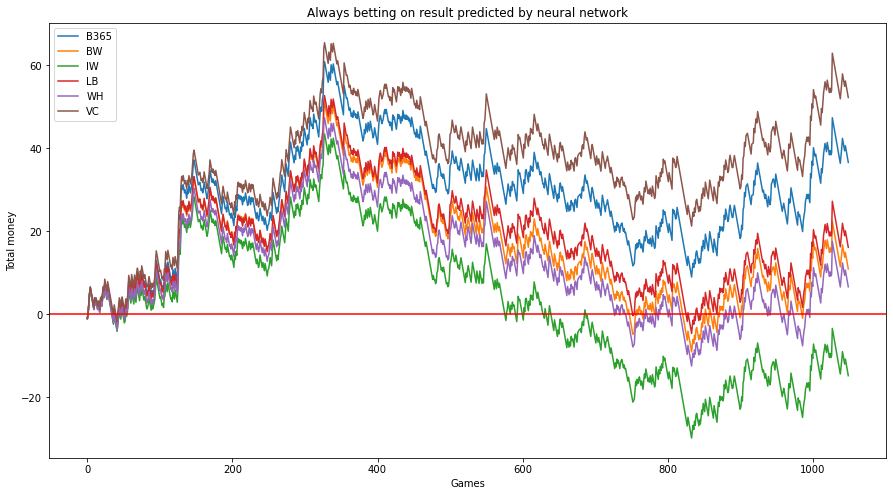

In [41]:
predictions = np.argmax(model.predict(X_test), axis=1)

for bk in bookmakers:
    profit = bet_on_prediction(X_test, y_test, predictions, bk)
    print("BK " + bk + ": profit " + str(round(profit, 2)))
    
plt.legend()
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel("Games")
plt.ylabel("Total money")
plt.title("Always betting on result predicted by neural network")
plt.savefig("images/betting_neural_network.png")

In [42]:
def bet_on_prediction_without_draws(X_test, y_test, predictions, bookmaker):
    money = 0
    money_on_bet = 1
    money_states = []
    
    for index, prediction in enumerate(predictions):

        coefficients = [X_test.iloc[index][bookmaker + "A"], X_test.iloc[index][bookmaker + "D"], X_test.iloc[index][bookmaker + "H"]]
        
        # dont make bets if NN predicts draw
        if prediction != 1:
            # make a bet
            money -= money_on_bet

            # win money
            if prediction == y_test.iloc[index]:
                money += money_on_bet * coefficients[prediction]

            money_states.append(money)
        
    plt.plot(money_states, label=bookmaker)
    
    return money

BK B365: profit 14.24
BK BW: profit -0.97
BK IW: profit -17.38
BK LB: profit 4.84
BK WH: profit 5.86
BK VC: profit 23.7


Text(0.5, 1.0, 'Always betting on result predicted by neural network (no draws)')

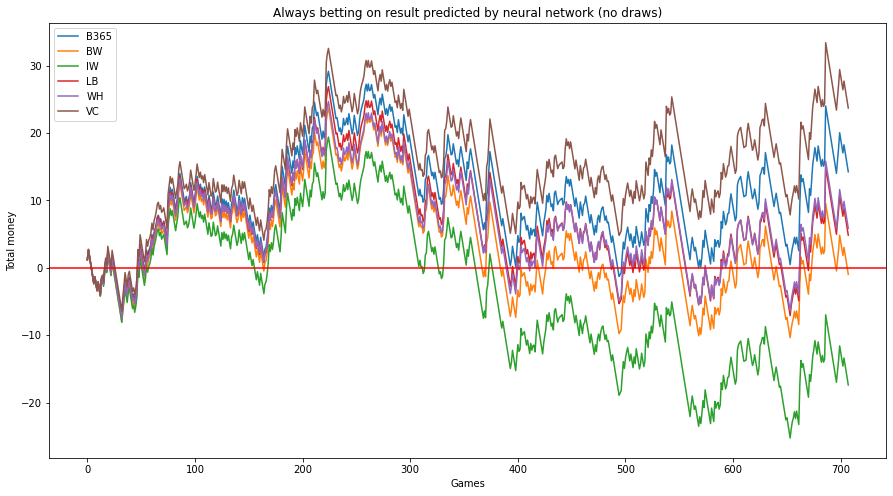

In [43]:
for bk in bookmakers:
    profit = bet_on_prediction_without_draws(X_test, y_test, predictions, bk)
    print("BK " + bk + ": profit " + str(round(profit, 2)))
    
plt.legend()
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel("Games")
plt.ylabel("Total money")
plt.title("Always betting on result predicted by neural network (no draws)")

## Predicting using random forest model

In [44]:
from joblib import load
random_forest = load("modules/neural_network/Random_forest.joblib")

BK B365: profit 321.8
BK BW: profit 302.86
BK IW: profit 276.13
BK LB: profit 303.67
BK WH: profit 312.3
BK VC: profit 334.16


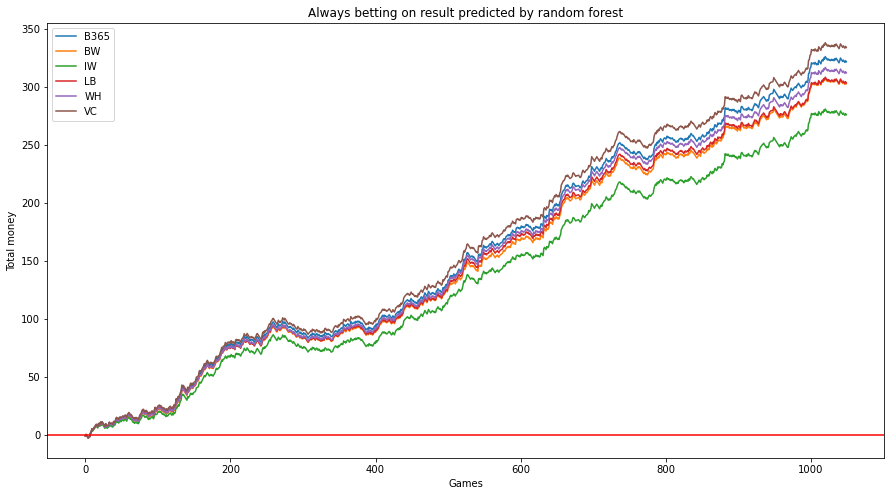

In [45]:
predictions = random_forest.predict(X_test)

for bk in bookmakers:
    profit = bet_on_prediction(X_test, y_test.astype(np.int64), predictions.astype(np.int64), bk)
    print("BK " + bk + ": profit " + str(round(profit, 2)))
    
plt.legend()
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel("Games")
plt.ylabel("Total money")
plt.title("Always betting on result predicted by random forest")
plt.savefig("images/betting_random_forest.png")

## Predicting the label that gives us the best odds

In [48]:
def bet_on_best_odds(X_test, y_test, predictions, bookmaker):
    money = 0
    money_on_bet = 1
    money_states = []
    
    for index, probabilities in enumerate(predictions):

        coefficients = [X_test.iloc[index][bookmaker + "A"], X_test.iloc[index][bookmaker + "D"], X_test.iloc[index][bookmaker + "H"]]
        
        # make a bet
        money -= money_on_bet
        
        odds = coefficients*probabilities
        prediction = np.argmax(odds)
        
        # win money
        if prediction == y_test.iloc[index]:
            money += money_on_bet * coefficients[prediction]
            
        money_states.append(money)
        
    plt.plot(money_states, label=bookmaker)
    
    return money

BK B365: profit -17.71
BK BW: profit -88.4
BK IW: profit -115.45
BK LB: profit -75.33
BK WH: profit -44.73
BK VC: profit -34.64


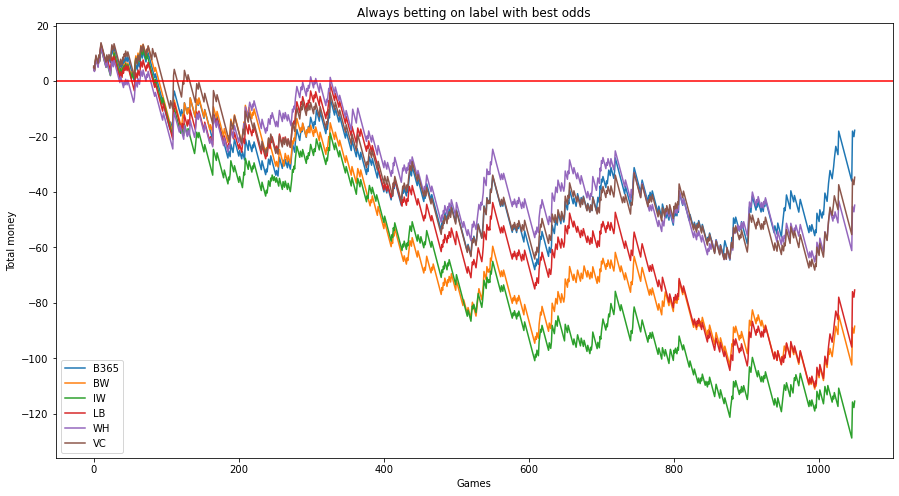

In [49]:
predictions = model.predict(X_test)

for bk in bookmakers:
    profit = bet_on_best_odds(X_test, y_test, predictions, bk)
    print("BK " + bk + ": profit " + str(round(profit, 2)))
    
plt.legend()
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel("Games")
plt.ylabel("Total money")
plt.title("Always betting on label with best odds")
plt.savefig("images/betting_best_odds.png")